In [4]:
import numpy as np
import skimage.io as io
import skimage

import matplotlib.pyplot as plt
import cv2



In [5]:
def get_range(sr,first_row,last_row,first_column,last_column):
    if sr: return range(first_row,last_row)
    return range(first_column,last_column)

def crop_image_line(img,sr,first_row,last_row,first_column,last_column,thresh,ct):   #sr - scan rows
    
    min = -1
    max = -1
    thickness = 0
    for i in get_range(sr,first_row,last_row,first_column,last_column):
        v = []
        min_j = -1
        max_j = -1
        thickness_j = 0
        for j in get_range(not sr,first_row,last_row,first_column,last_column):
            red , green , blue , a = img[i,j]  if sr else img[j,i] 
            #test black
            L = np.max([red,green,blue])
            v.append(L)

            #if L < ct:
            #    if thickness_j > 50:
            #        if min_j == -1: min_j = j - thickness_j
            #        max_j = j
            #    thickness_j += 1
            #else: thickness_j = 0
                
        # test line 
        cnt = sum(color_max < ct for color_max in v)
        
        line_length = (last_column - first_column + 1) if sr else (last_row - first_row + 1)
        #print("classic",line_length)
        #line_length = max_j - min_j + 1
        #print("min_j/max_j",min_j,max_j,line_length)

        
        
        if cnt > line_length * thresh:
            if thickness > 50:
                if min == -1: min = i - thickness
                max = i
                
            thickness += 1
        else: thickness = 0
        
    return min,max  
            




def draw_image(path,thresh,ct):
    I = io.imread(path)

    if I.shape[2] == 3:
        I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);


    plt.rcParams['figure.dpi'] = 100
    plt.axis('off')
    #plt.imshow(I)
    rows , columns, channels= I.shape
    print(rows , columns, channels) 

    #thresh = 0.5
    #ct = 3
    
    nimg = np.copy(I)

    min,max = crop_image_line(I,True,0,rows-1,0,columns-1,thresh,ct)
    
    print(0,rows-1,"=>",min,max)

    cv2.line(nimg,(0,min),(columns-1,min),(255,255,255),thickness = 1)
    cv2.line(nimg,(0,max),(columns-1,max),(255,255,255),thickness = 1)

    min,max = crop_image_line(I,False,0,rows-1,0,columns-1,thresh,ct)

    print(0,columns-1,"=>",min,max)

    cv2.line(nimg,(min,0),(min,rows-1),(255,255,255),thickness = 1)
    cv2.line(nimg,(max,0),(max,rows-1),(255,255,255),thickness = 1)

    plt.imshow(nimg)


In [6]:
draw_image('../data/drohne-signals/traffic_light0032.png',0.5,1)

370 201 4
0 369 => 16 327
0 200 => 14 178


In [15]:
draw_image("data/gen-signals/kshauptsignal2_Ks2_vBw.png",0.5,1)

200 100 4
0 199 => 10 181
0 99 => 5 95


774 444 4
0 773 => 7 630
0 443 => 63 392


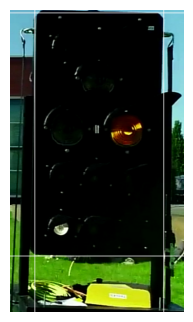

In [16]:
draw_image("data/drohne-signals/traffic_light0011.png",0.5,10)

713 405 4
0 712 => 36 560
0 404 => 56 361


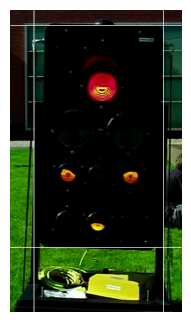

In [17]:
draw_image("data/drohne-signals/traffic_light0029.png",0.5,10)

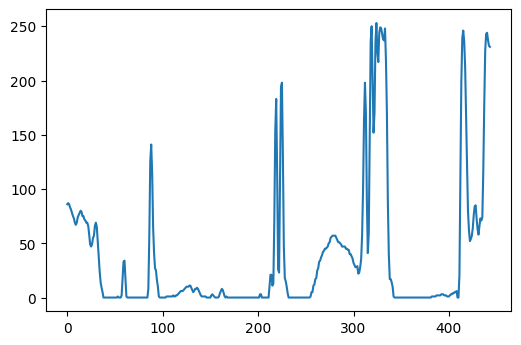

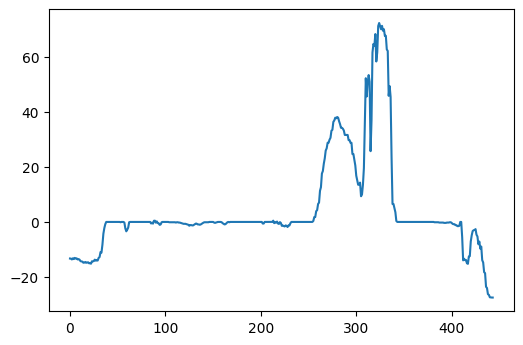

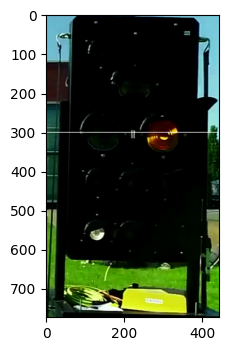

In [22]:
I = io.imread("data/drohne-signals/traffic_light0011.png")
r = 300


#I = io.imread("data/color_bubbles.png")
#r = 130

if I.shape[2] == 3:
    I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);

rows , columns, channels= I.shape


x = []
y = []
yL = []
ya = []
yb = []
yab = []

for c in range(columns):
    x.append(c)
    red , green , blue , a = I[r,c] 
    y.append(np.max([red,green,blue]))
    L , a , b = skimage.color.rgb2lab((red,green,blue))
    yL.append(L)
    ya.append(a)
    yb.append(b)
    yab.append(a+b)


plt.plot(x,y)
plt.show()

plt.plot(x,yab)
plt.show()

nimg = np.copy(I)
cv2.line(nimg,(0,r),(columns-1,r),(255,255,255),thickness = 1)
plt.imshow(nimg)
   

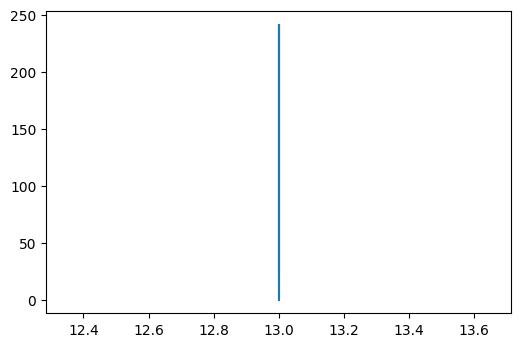

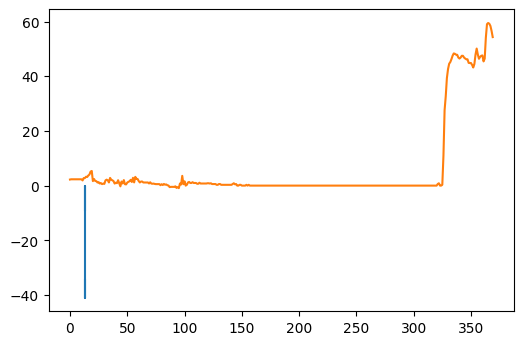

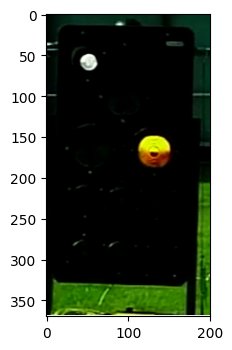

In [19]:
I = io.imread("data/drohne-signals/traffic_light0032.png")
c = 13 #15

if I.shape[2] == 3:
    I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);

rows , columns, channels= I.shape


x = []
y = []
yL = []
ya = []
yb = []

for r in range(rows):
    x.append(c)
    red , green , blue , a = I[r,c] 
    y.append(np.max([red,green,blue]))
    L , a , b = skimage.color.rgb2lab((red,green,blue))
    yL.append(L)
    ya.append(a)
    yb.append(b)


plt.plot(x,y)
plt.show()

plt.plot(x,ya,yb)
plt.show()

nimg = np.copy(I)
cv2.line(nimg,(0,r),(columns-1,r),(255,255,255),thickness = 1)
plt.imshow(nimg)
